In [1]:
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt

C:\Softwares\Anaconda3\envs\pytorch_gpu\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Softwares\Anaconda3\envs\pytorch_gpu\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Softwares\Anaconda3\envs\pytorch_gpu\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df = pd.read_csv('politifact_issues.csv', index_col = 0)

In [3]:
df

,url,speaker,speaker_info,statement,rating,where_when,title,content,content_html,factchecker,factchecker_info,factcheck_date,label,party,issues
0,https://www.politifact.com/factchecks/2022/mar...,Viral image,https://www.politifact.com/personalities/viral...,"CNN staged a fire in Edmonton, Canada, and cla...",https://static.politifact.com/politifact/rulin...,"stated on March 28, 2022 in a Facebook post:","No, this Edmonton jacket isn’t proof CNN stage...",CNN anchor Don Lemon has been reporting from U...,"<article class=""m-textblock"">\n<p>CNN anchor D...",Ciara O'Rourke,https://www.politifact.com/staff/ciara-orourke/,"March 28, 2022",False,None,"['facebook-fact-checks', 'ukraine']"
1,https://www.politifact.com/factchecks/2022/mar...,Facebook posts,https://www.politifact.com/personalities/faceb...,The United Nations sent out an email instructi...,https://static.politifact.com/politifact/rulin...,"stated on March 17, 2022 in a Facebook post:","Claim that the UN told staff not to use ‘war,’...",The United Nations is being criticized by some...,"<article class=""m-textblock"">\n<p>The United N...",Samantha Putterman,https://www.politifact.com/staff/samantha-putt...,"March 28, 2022",False,None,"['facebook-fact-checks', 'ukraine']"
2,https://www.politifact.com/factchecks/2022/mar...,YouTube videos,https://www.politifact.com/personalities/youtu...,A video shows Ukraine President Volodymyr Zele...,https://static.politifact.com/politifact/rulin...,"stated on March 19, 2022 in a YouTube video's ...",Does video show Zelenskyy singing ‘Imagine’ by...,A viral YouTube video watched more than 1 mill...,"<article class=""m-textblock"">\n<p>A viral YouT...",Bill McCarthy,https://www.politifact.com/staff/bill-mccarthy/,"March 28, 2022",False,None,"['facebook-fact-checks', 'pop-culture', 'ukrai..."
3,https://www.politifact.com/factchecks/2022/mar...,Eli Bremer,https://www.politifact.com/personalities/eli-b...,“If you look at windmills” and the greenhouse ...,https://static.politifact.com/politifact/rulin...,"stated on March 23, 2022 in an interview with ...",A GOP Senate candidate’s muddled claim about w...,Eli Bremer is one of seven Colorado Republican...,"<article class=""m-textblock"">\n<p>Eli Bremer i...",Jon Greenberg,https://www.politifact.com/staff/jon-greenberg/,"March 28, 2022",True,Republican,"['climate-change', 'energy']"
4,https://www.politifact.com/factchecks/2022/mar...,Viral image,https://www.politifact.com/personalities/viral...,Republicans “nominated the 1st Black woman to ...,https://static.politifact.com/politifact/rulin...,"stated on March 25, 2022 in a Facebook post:","No, Janice Rogers Brown wasn’t the first Black...",News reports have described Judge Ketanji Brow...,"<article class=""m-textblock"">\n<p>News reports...",Ciara O'Rourke,https://www.politifact.com/staff/ciara-orourke/,"March 28, 2022",False,None,"['facebook-fact-checks', 'supreme-court']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20819,https://www.politifact.com/factchecks/2008/jan...,Joe Biden,https://www.politifact.com/personalities/joe-b...,"""John doesn't have a record in the Senate. Joh...",https://static.politifact.com/politifact/rulin...,"stated on December 31, 2007 in a campaign even...",Edwards a significant player on several bills,"Before he bowed out of the race, Sen. Joe Bide...","<article class=""m-textblock"">\n<p>Before he bo...",Adriel Bettelheim,https://www.politifact.com/staff/adriel-bettel...,"January 7, 2008",False,Democrat,[]
20820,https://www.politifact.com/factchecks/2008/jan...,Hillary Clinton,https://www.politifact.com/personalities/hilla...,"""There are 7,000 kids in New Hampshire who hav...",https://static.politifact.com/politifact/rulin...,"stated on January 5, 2008 in a debate in Manch...",Clinton promoted children's health care,In a sharp exchange with John Edwards during a...,"<article class=""m-textblock"">\n<p>In a sharp e...",Angie Drobnic Holan,https://www.politifact.com/staff/angie-drobnic...,"January 

In [4]:
issues = df.issues

In [5]:
issues = [ast.literal_eval(i) for i in issues]

In [6]:
issues_all = set(sum(issues,[]))

In [7]:
len(issues_all)

152

In [8]:
df['Democrat'] = np.where(df['party'] == 'Democrat', 1, 0)
df['Republican'] = np.where(df['party'] == 'Republican', 1, 0)

In [9]:
class_left_right = {}
for num, cls in enumerate(issues_all):
    print(num)
    class_left_right[cls] = {}
    class_left_right[cls]['democrat_true'] = 0 
    class_left_right[cls]['democrat_false'] = 0
    class_left_right[cls]['republican_true'] = 0 
    class_left_right[cls]['republican_false'] = 0
    
    for row in df.iloc:
        if cls in row.issues and row.label == False:
            if row.Democrat == 1:
                class_left_right[cls]['democrat_false'] += 1
            elif row.Republican == 1:
                class_left_right[cls]['republican_false'] += 1
                
        elif cls in row.issues and row.label == True:
            if row.Democrat == 1:
                class_left_right[cls]['democrat_true'] += 1
            elif row.Republican == 1:
                class_left_right[cls]['republican_true'] += 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151


In [10]:
class_df = pd.DataFrame(class_left_right).T
class_df

,democrat_true,democrat_false,republican_true,republican_false
afghanistan,26,13,6,14
urban,6,3,1,6
fires,1,0,1,6
welfare,13,2,23,25
elections,212,134,233,375
...,...,...,...,...
tourism,8,3,12,7
criminal-justice,100,70,67,116
county-budget,11,16,17,11
state-budget,193,168,247,248


In [11]:
class_df['republican_false_prop'] = class_df.republican_false/(class_df.republican_false + class_df.republican_true)

In [12]:
class_df['democrat_false_prop'] = class_df.democrat_false/(class_df.democrat_false + class_df.democrat_true)

In [13]:
class_df = class_df.dropna()

In [14]:
class_df['sum'] = class_df['republican_false_prop'] + class_df['democrat_false_prop']

C:\Users\Rando\AppData\Local\Temp/ipykernel_18936/2763303736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_df['sum'] = class_df['republican_false_prop'] + class_df['democrat_false_prop']


In [15]:
class_df = class_df[class_df['sum'] > 0]

In [16]:
class_df['ratio'] = class_df['democrat_false_prop'] /  class_df['republican_false_prop']

In [17]:
class_df

,democrat_true,democrat_false,republican_true,republican_false,republican_false_prop,democrat_false_prop,sum,ratio
afghanistan,26,13,6,14,0.700000,0.333333,1.033333,0.476190
urban,6,3,1,6,0.857143,0.333333,1.190476,0.388889
fires,1,0,1,6,0.857143,0.000000,0.857143,0.000000
welfare,13,2,23,25,0.520833,0.133333,0.654167,0.256000
elections,212,134,233,375,0.616776,0.387283,1.004060,0.627915
...,...,...,...,...,...,...,...,...
tourism,8,3,12,7,0.368421,0.272727,0.641148,0.740260
criminal-justice,100,70,67,116,0.633880,0.411765,1.045644,0.649594
county-budget,11,16,17,11,0.392857,0.592593,0.985450,1.508418
state-budget,193,168,247,248,0.501010,0.465374,0.966384,0.928871


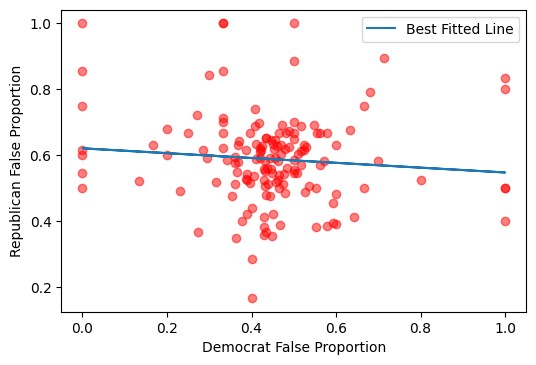

In [23]:
plt.figure(dpi = 100)
coef = np.polyfit(class_df['democrat_false_prop'], class_df['republican_false_prop'], 1)
poly1d_fn = np.poly1d(coef)
plt.plot(class_df['democrat_false_prop'], class_df['republican_false_prop'], 'ro', alpha = 0.5)
plt.plot(class_df['democrat_false_prop'], poly1d_fn(class_df['democrat_false_prop']), label = 'Best Fitted Line')
plt.xlabel('Democrat False Proportion')
plt.ylabel('Republican False Proportion')
plt.legend(loc = 'upper right')
plt.savefig('topic.png')

In [26]:
stats.pearsonr(class_df['democrat_false_prop'],class_df['republican_false_prop'])

(-0.0935314180841394, 0.2598273243631786)

In [27]:
class_df

,democrat_true,democrat_false,republican_true,republican_false,republican_false_prop,democrat_false_prop,sum,ratio
afghanistan,26,13,6,14,0.700000,0.333333,1.033333,0.476190
urban,6,3,1,6,0.857143,0.333333,1.190476,0.388889
fires,1,0,1,6,0.857143,0.000000,0.857143,0.000000
welfare,13,2,23,25,0.520833,0.133333,0.654167,0.256000
elections,212,134,233,375,0.616776,0.387283,1.004060,0.627915
...,...,...,...,...,...,...,...,...
tourism,8,3,12,7,0.368421,0.272727,0.641148,0.740260
criminal-justice,100,70,67,116,0.633880,0.411765,1.045644,0.649594
county-budget,11,16,17,11,0.392857,0.592593,0.985450,1.508418
state-budget,193,168,247,248,0.501010,0.465374,0.966384,0.928871


In [25]:
from scipy import stats

In [53]:
df

,url,speaker,speaker_info,statement,rating,where_when,title,content,content_html,factchecker,factchecker_info,factcheck_date,label,party,issues,Democrat,Republican,class_value
0,https://www.politifact.com/factchecks/2022/mar...,Viral image,https://www.politifact.com/personalities/viral...,"CNN staged a fire in Edmonton, Canada, and cla...",https://static.politifact.com/politifact/rulin...,"stated on March 28, 2022 in a Facebook post:","No, this Edmonton jacket isn’t proof CNN stage...",CNN anchor Don Lemon has been reporting from U...,"<article class=""m-textblock"">\n<p>CNN anchor D...",Ciara O'Rourke,https://www.politifact.com/staff/ciara-orourke/,"March 28, 2022",False,None,"['facebook-fact-checks', 'ukraine']",0,0,NaN
1,https://www.politifact.com/factchecks/2022/mar...,Facebook posts,https://www.politifact.com/personalities/faceb...,The United Nations sent out an email instructi...,https://static.politifact.com/politifact/rulin...,"stated on March 17, 2022 in a Facebook post:","Claim that the UN told staff not to use ‘war,’...",The United Nations is being criticized by some...,"<article class=""m-textblock"">\n<p>The United N...",Samantha Putterman,https://www.politifact.com/staff/samantha-putt...,"March 28, 2022",False,None,"['facebook-fact-checks', 'ukraine']",0,0,NaN
2,https://www.politifact.com/factchecks/2022/mar...,YouTube videos,https://www.politifact.com/personalities/youtu...,A video shows Ukraine President Volodymyr Zele...,https://static.politifact.com/politifact/rulin...,"stated on March 19, 2022 in a YouTube video's ...",Does video show Zelenskyy singing ‘Imagine’ by...,A viral YouTube video watched more than 1 mill...,"<article class=""m-textblock"">\n<p>A viral YouT...",Bill McCarthy,https://www.politifact.com/staff/bill-mccarthy/,"March 28, 2022",False,None,"['facebook-fact-checks', 'pop-culture', 'ukrai...",0,0,NaN
3,https://www.politifact.com/factchecks/2022/mar...,Eli Bremer,https://www.politifact.com/personalities/eli-b...,“If you look at windmills” and the greenhouse ...,https://static.politifact.com/politifact/rulin...,"stated on March 23, 2022 in an interview with ...",A GOP Senate candidate’s muddled claim about w...,Eli Bremer is one of seven Colorado Republican...,"<article class=""m-textblock"">\n<p>Eli Bremer i...",Jon Greenberg,https://www.politifact.com/staff/jon-greenberg/,"March 28, 2022",True,Republican,"['climate-change', 'energy']",0,1,NaN
4,https://www.politifact.com/factchecks/2022/mar...,Viral image,https://www.politifact.com/personalities/viral...,Republicans “nominated the 1st Black woman to ...,https://static.politifact.com/politifact/rulin...,"stated on March 25, 2022 in a Facebook post:","No, Janice Rogers Brown wasn’t the first Black...",News reports have described Judge Ketanji Brow...,"<article class=""m-textblock"">\n<p>News reports...",Ciara O'Rourke,https://www.politifact.com/staff/ciara-orourke/,"March 28, 2022",False,None,"['facebook-fact-checks', 'supreme-court']",0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20819,https://www.politifact.com/factchecks/2008/jan...,Joe Biden,https://www.politifact.com/personalities/joe-b...,"""John doesn't have a record in the Senate. Joh...",https://static.politifact.com/politifact/rulin...,"stated on December 31, 2007 in a campaign even...",Edwards a significant player on several bills,"Before he bowed out of the race, Sen. Joe Bide...","<article class=""m-textblock"">\n<p>Before he bo...",Adriel Bettelheim,https://www.politifact.com/staff/adriel-bettel...,"January 7, 2008",False,Democrat,[],1,0,NaN
20820,https://www.politifact.com/factchecks/2008/jan...,Hillary Clinton,https://www.politifact.com/personalities/hilla...,"""There are 7,000 kids in New Hampshire who hav...",https://static.politifact.com/politifact/rulin...,"stated on January 5, 2008 in a debate in Manch...",Clinton promoted children's health care,In a sharp exchange with John Edwards during a...,"<article class=""m-textblock"">\n<p>In a

In [54]:
df['issues'] = issues

In [55]:
cls_val = []
for row in df.iloc:
    cur_val = []
    for cls in row['issues']:
        try:
            cur_val.append(class_df.loc[cls]['ratio'])
        except:
            pass
    cls_val.append(cur_val)

In [56]:
cls_val

[[0.5641025641025641, 0.5],
 [0.5641025641025641, 0.5],
 [0.5641025641025641, 1.5333333333333332, 0.5],
 [0.37370704037370706, 0.6070991432068543],
 [0.5641025641025641, 0.9816849816849816],
 [0.5641025641025641, 0.3333333333333333, 0.5],
 [0.7983193277310925,
  0.7483870967741935,
  0.6495943204868153,
  0.7043059007640615],
 [0.6366984126984128,
  0.6495943204868153,
  0.5641025641025641,
  0.5353535353535354,
  0.9816849816849816],
 [0.5641025641025641],
 [0.5641025641025641],
 [1.5333333333333332, 0.3333333333333333, 0.5],
 [0.6495943204868153, 0.688395061728395, 0.9816849816849816],
 [0.5641025641025641, 0.3333333333333333, 0.5],
 [0.6851588851411325, 0.7129821446187234, 0.6764946764946765],
 [0.5641025641025641, 0.3333333333333333, 0.5],
 [0.7483870967741935,
  0.7751112715024661,
  0.9816849816849816,
  0.7824569221628045],
 [0.6851588851411325, 0.5641025641025641, 0.6764946764946765],
 [0.5641025641025641],
 [0.6851588851411325, 0.5641025641025641],
 [0.5641025641025641, 0.9816

In [57]:
cls_val_mean = [np.mean(row) for row in cls_val]

C:\Softwares\Anaconda3\envs\pytorch_gpu\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Softwares\Anaconda3\envs\pytorch_gpu\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [58]:
df['class_value'] = cls_val_mean

In [59]:
cls_val_mean_df = df.groupby('factchecker').mean()

In [49]:
r = pd.read_csv('raters_may22.csv')

In [60]:
merged = r.merge(cls_val_mean_df, on = 'factchecker', how = 'left')

In [81]:
merged = merged.rename(columns = {'sentiment_final':'sentiment_score', 'class_value':'topic_score'})

In [82]:
merged[['factchecker', 'demo_false_proportion', 'repub_false_proportion', 'sentiment_score', 'topic_score']]

,factchecker,demo_false_proportion,repub_false_proportion,sentiment_score,topic_score
0,Aaron Marshall,0.266667,0.473684,-0.052071,0.827093
1,Aaron Sharockman,0.430380,0.443709,-0.430605,0.811096
2,Adam Reckamp,0.001000,1.000000,0.006973,0.865030
3,Adam Thorp,0.001000,0.666667,-0.708642,0.737794
4,Adriel Bettelheim,0.357143,0.300000,-0.322476,0.839475
...,...,...,...,...,...
216,William Skipworth,0.333333,0.600000,-0.771877,0.728145
217,Willoughby Mariano,0.540541,0.517857,-0.310006,0.793956
218,Xander Landen,0.001000,0.333333,-0.421723,0.881637
219,Yacob Reyes,0.001000,1.000000,0.001867,0.622829


In [69]:
import statsmodels.formula.api as smf
model = smf.ols(formula='demo_false_proportion ~ repub_false_proportion + sentiment_final + class_value', data = merged).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     demo_false_proportion   R-squared:                       0.003
Model:                               OLS   Adj. R-squared:                 -0.011
Method:                    Least Squares   F-statistic:                    0.2045
Date:                   Sun, 22 May 2022   Prob (F-statistic):              0.893
Time:                           20:51:58   Log-Likelihood:                -58.800
No. Observations:                    221   AIC:                             125.6
Df Residuals:                        217   BIC:                             139.2
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.3049      0.266      1.147      0.252      -0.219       0.829
repub_false_proportion    -0.0416      0.085     -0.492      0.623      -0.209       0.125
sentiment_final           -0.0130      0.076     -0.171      0.864      -0.163       0.137
class_value                0.1674      0.318      0.526      0.599      -0.460       0.795
==============================================================================
Omnibus:                       13.713   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               12.609
Skew:                           0.520   Prob(JB):                      0.00183
Kurtosis:                       2.462   Cond. No.                         28.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
merged = merged[merged['sum_prop'] > 0]

In [80]:
merged.demo_false_proportion.corr(merged.repub_false_proportion)

-0.03840704882822104

In [74]:
from scipy.stats import pearsonr

In [78]:
pearsonr(merged_filtered.demo_false_proportion, merged_filtered.repub_false_proportion)

(0.11355988868362776, 0.1501936696448903)

In [77]:
merged_filtered = merged[(merged['demo_false_proportion']!=0) & (merged['demo_false_proportion']!=1)&(merged['repub_false_proportion']!=0)&(merged['repub_false_proportion']!=1)]

In [86]:
r = pd.read_csv('r_work.csv',index_col = 0)

In [87]:
r

,factchecker,democrat_false,republican_false,democrat,republican,demo_false_proportion,repub_false_proportion,sum,sum_prop,prop,final
0,Aaron Marshall,4,9,15,19,0.266667,0.473684,34,0.740351,0.562963,-0.502316
1,Aaron Sharockman,34,67,79,151,0.430380,0.443709,230,0.874088,0.969960,-0.692959
2,Adam Aton,0,1,1,1,0.000000,1.000000,2,1.000000,0.000000,-0.995221
3,Adam Reckamp,0,1,1,1,0.000000,1.000000,2,1.000000,0.000000,-0.490983
4,Adam Thorp,0,2,2,3,0.000000,0.666667,5,0.666667,0.000000,-0.849486
...,...,...,...,...,...,...,...,...,...,...,...
247,William Skipworth,1,3,3,5,0.333333,0.600000,8,0.933333,0.555556,-0.882881
248,Willoughby Mariano,20,58,37,112,0.540541,0.517857,149,1.058398,1.043802,-0.621870
249,Xander Landen,0,1,3,3,0.000000,0.333333,6,0.333333,0.000000,-0.706543
250,Yacob Reyes,0,2,3,2,0.000000,1.000000,5,1.000000,0.000000,-0.473656


In [97]:
merged['diff'] = merged.demo_false_proportion - merged.repub_false_proportion

In [88]:
cls_val_mean_df

,label,Democrat,Republican,class_value
factchecker,,,,
Aaron Marshall,0.560976,0.365854,0.463415,0.827093
Aaron Sharockman,0.514851,0.260726,0.498350,0.811096
Adam Aton,0.333333,0.333333,0.333333,0.704092
Adam Reckamp,0.500000,0.500000,0.500000,0.865030
Adam Thorp,0.571429,0.285714,0.428571,0.737794
...,...,...,...,...
Zach DeLuca,0.000000,1.000000,0.000000,0.646640
Zack McMillin,0.500000,0.428571,0.357143,0.891226
Zack Schwehm,1.000000,0.000000,0.000000,0.821946


In [89]:
merged = r.merge(cls_val_mean_df, on = 'factchecker', how = 'left')

In [103]:
import statsmodels.formula.api as smf
model = smf.ols(formula='demo_false_proportion ~ repub_false_proportion + final + class_value', data = merged).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     demo_false_proportion   R-squared:                       0.019
Model:                               OLS   Adj. R-squared:                  0.007
Method:                    Least Squares   F-statistic:                     1.582
Date:                   Sun, 22 May 2022   Prob (F-statistic):              0.194
Time:                           21:38:20   Log-Likelihood:                -76.922
No. Observations:                    252   AIC:                             161.8
Df Residuals:                        248   BIC:                             176.0
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.4204      0.271      1.551      0.122      -0.113       0.954
repub_false_proportion    -0.1452      0.074     -1.962      0.051      -0.291       0.001
final                      0.0224      0.133      0.169      0.866      -0.239       0.283
class_value                0.1289      0.304      0.425      0.672      -0.469       0.727
==============================================================================
Omnibus:                       20.426   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.971
Skew:                           0.518   Prob(JB):                     0.000340
Kurtosis:                       2.331   Cond. No.                         30.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'averaged sentiment score(y)')

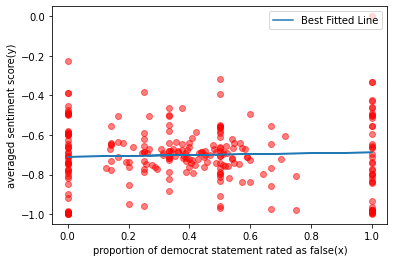

In [105]:
coef = np.polyfit(merged['demo_false_proportion'], merged['final'],1)

poly1d_fn = np.poly1d(coef)

plt.plot(merged['demo_false_proportion'], merged['final'], 'ro', alpha = 0.5)
plt.plot(merged['demo_false_proportion'], poly1d_fn(merged['demo_false_proportion']), label = 'Best Fitted Line')
plt.legend(loc = 'upper right')

plt.xlabel('proportion of democrat statement rated as false(x)')
plt.ylabel('averaged sentiment score(y)')

Text(0, 0.5, 'averaged topic score(y)')

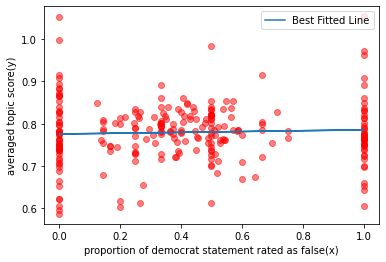

In [108]:
coef = np.polyfit(merged['demo_false_proportion'], merged['class_value'],1)

poly1d_fn = np.poly1d(coef)

plt.plot(merged['demo_false_proportion'], merged['class_value'], 'ro', alpha = 0.5)
plt.plot(merged['demo_false_proportion'], poly1d_fn(merged['demo_false_proportion']), label = 'Best Fitted Line')
plt.legend(loc = 'upper right')

plt.xlabel('proportion of democrat statement rated as false(x)')
plt.ylabel('averaged topic score(y)')

In [112]:
merged = merged.rename(columns = {'final':'sentiment_score', 'class_value':'topic_score'})

In [114]:
merged[['factchecker', 'demo_false_proportion', 'repub_false_proportion', 'sentiment_score','topic_score']].to_csv('raters.csv')